In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

In [2]:
heart = pd.read_csv('heart_disease.csv')
df = heart.copy()
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [4]:
df.shape

(10000, 21)

In [5]:
df.describe()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9971.000000,9981.000000,9970.000000,9978.000000,9975.000000,9974.000000,9978.000000,9974.000000,9980.000000
mean,49.296259,149.757740,225.425577,29.077269,6.991329,250.734409,120.142213,7.472201,12.456271
std,18.193970,17.572969,43.575809,6.307098,1.753195,87.067226,23.584011,4.340248,4.323426
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.658075,5.449866,176.000000,99.000000,3.674126,8.723334
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000,7.472164,12.409395
75%,65.000000,165.000000,263.000000,34.520015,8.531577,326.000000,141.000000,11.255592,16.140564
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


In [6]:
df.isnull().sum()

Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64

<Figure size 1200x800 with 0 Axes>

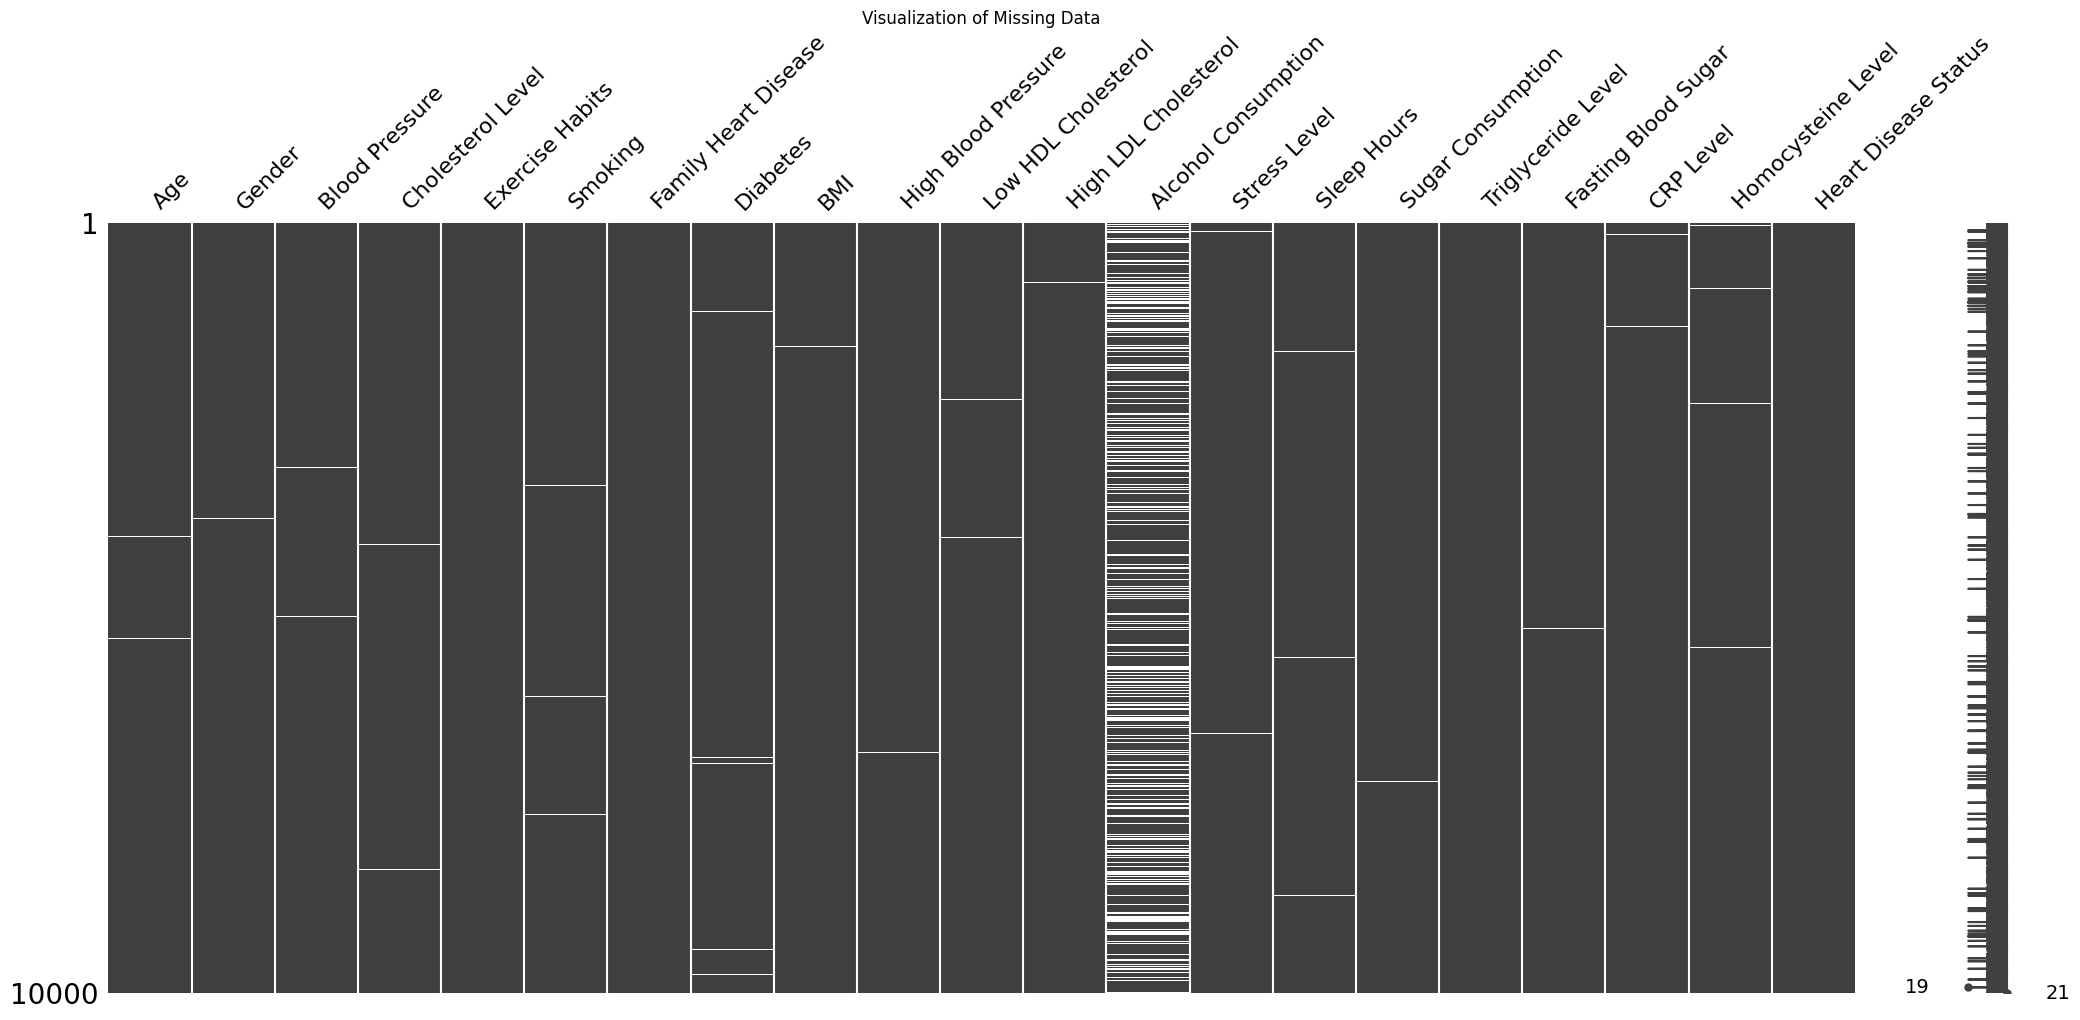

In [7]:
plt.figure(figsize=(12, 8))
msno.matrix(df)
plt.title("Visualization of Missing Data")
plt.show()

In [8]:
df['Alcohol Consumption'] = df['Alcohol Consumption'].fillna(df['Alcohol Consumption'].mode()[0])

In [9]:
df = df.dropna()

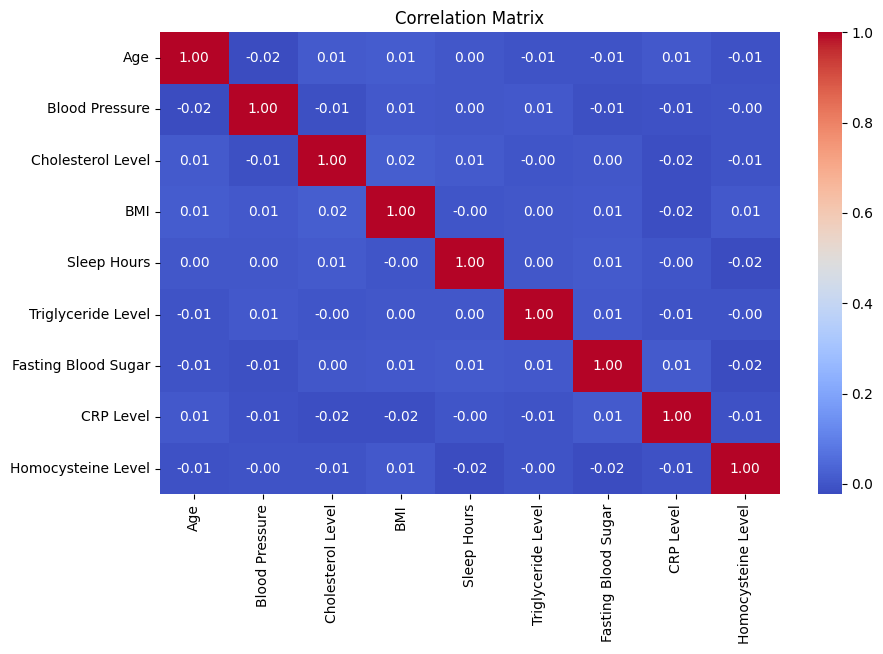

In [10]:
df_numerical = df.select_dtypes(include = ['int64','Float64'])
correlation_matrix = df_numerical.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Histograms of numerical data

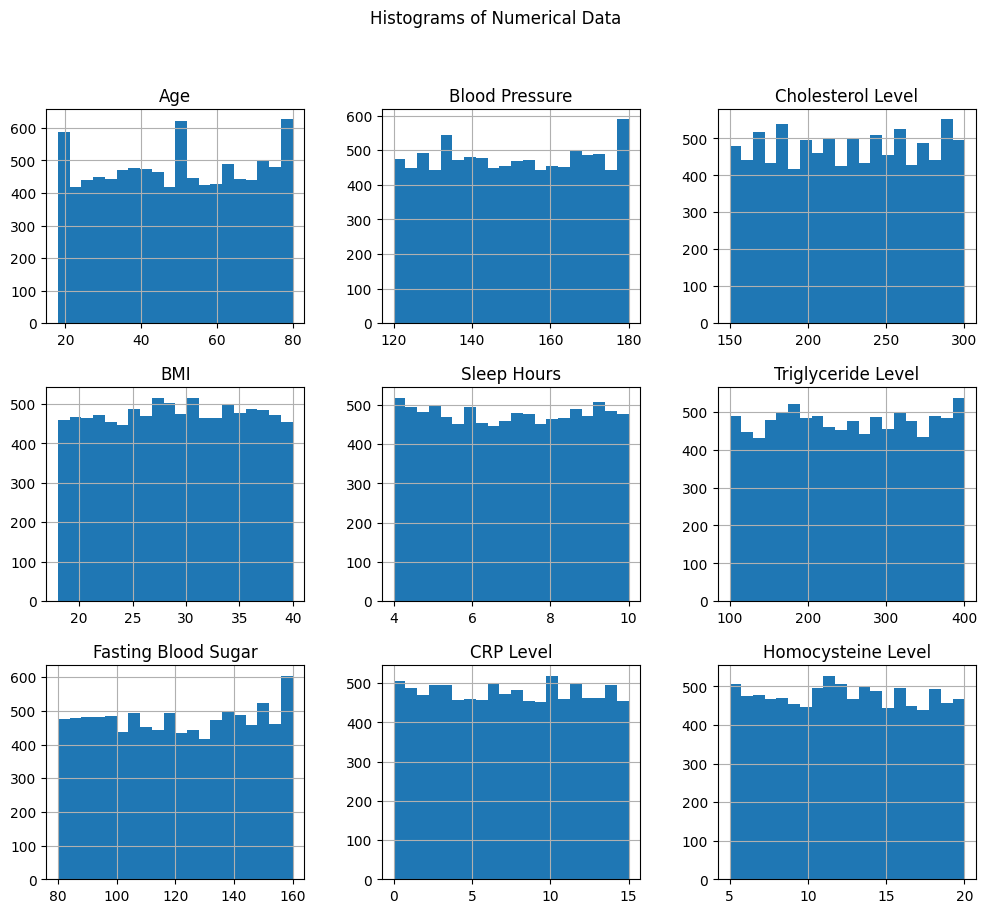

In [11]:
numerical_cols = df.select_dtypes(include=['float64']).columns
df[numerical_cols].hist(bins=20, figsize=(12, 10))
plt.suptitle("Histograms of Numerical Data")
plt.show()

### Distribution of categorical variables

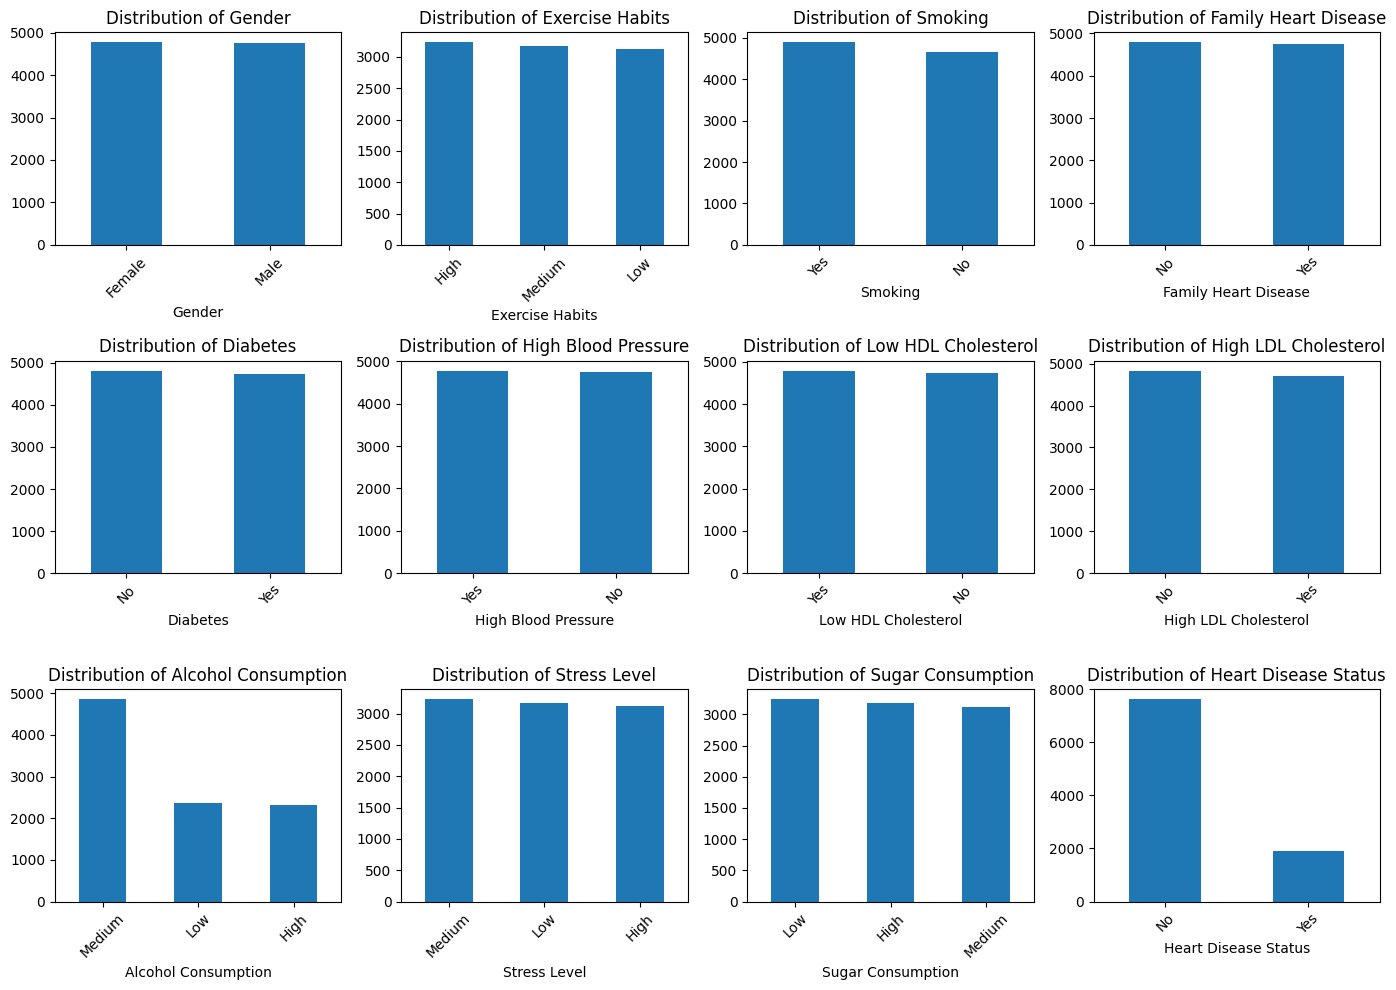

In [12]:
categorical_cols = df.select_dtypes(include=['object']).columns
plt.figure(figsize=(14, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 4, i)
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Relationship between Age and Heart Disease Status

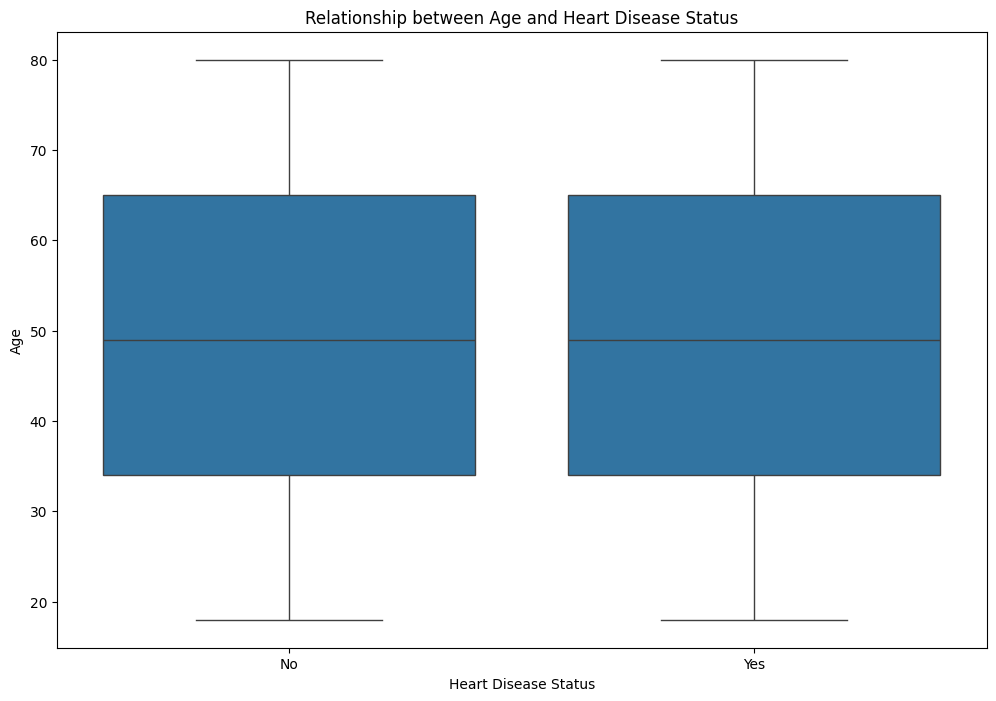

In [13]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Heart Disease Status', y='Age', data=df)
plt.title('Relationship between Age and Heart Disease Status')
plt.show()

### Mean Values of Numerical Variables Based on Heart Disease Status

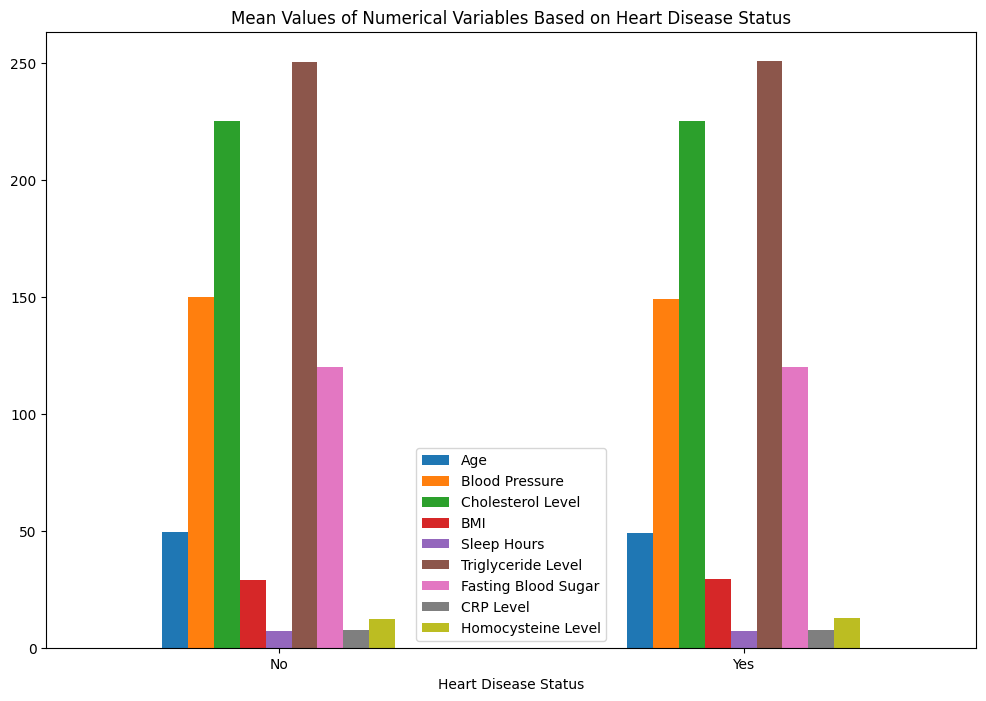

In [14]:
heart_disease_grouped = df.groupby('Heart Disease Status')[numerical_cols].mean()
heart_disease_grouped.plot(kind='bar', figsize=(12, 8))
plt.title('Mean Values of Numerical Variables Based on Heart Disease Status')
plt.xticks(rotation=0)
plt.show()

### Pie chart of the dependent variable (Heart Disease Status)

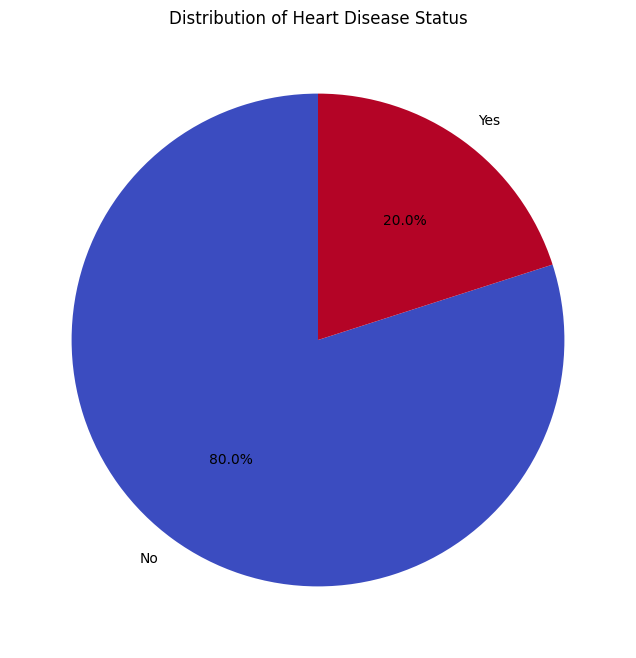

In [15]:
plt.figure(figsize=(8, 8))
df['Heart Disease Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='coolwarm', legend=False)
plt.title('Distribution of Heart Disease Status')
plt.ylabel('')
plt.show()

In [16]:
encoder = LabelEncoder()

label_mappings = {}

for col in df.select_dtypes('object'):
    df[col] = encoder.fit_transform(df[col])
    label_mappings[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

for col, mapping in label_mappings.items():
    print(f"Column: {col}")
    for label, code in mapping.items():
        print(f"{code} -> {label}")
    print()

Column: Gender
0 -> Female
1 -> Male

Column: Exercise Habits
0 -> High
1 -> Low
2 -> Medium

Column: Smoking
0 -> No
1 -> Yes

Column: Family Heart Disease
0 -> No
1 -> Yes

Column: Diabetes
0 -> No
1 -> Yes

Column: High Blood Pressure
0 -> No
1 -> Yes

Column: Low HDL Cholesterol
0 -> No
1 -> Yes

Column: High LDL Cholesterol
0 -> No
1 -> Yes

Column: Alcohol Consumption
0 -> High
1 -> Low
2 -> Medium

Column: Stress Level
0 -> High
1 -> Low
2 -> Medium

Column: Sugar Consumption
0 -> High
1 -> Low
2 -> Medium

Column: Heart Disease Status
0 -> No
1 -> Yes



## Machine Learning

### Train Test Split

In [17]:
from sklearn.model_selection import train_test_split

X = df.drop('Heart Disease Status',axis = 1)
y = df['Heart Disease Status']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,X_test.shape)

(7625, 20) (1907, 20)


In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### KNN

In [20]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)

In [21]:
y_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred)
knn_accuracy

0.7703198741478763

### Random Forest

In [22]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [23]:
y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred)
rf_accuracy

0.8012585212375459

### Logistic Resression

In [24]:
loj = LogisticRegression(solver = 'liblinear')
loj_model = loj.fit(X, y)

In [25]:
y_pred = loj_model.predict(X)
lr_accuracy = accuracy_score(y, y_pred)
lr_accuracy

0.7995174150230802

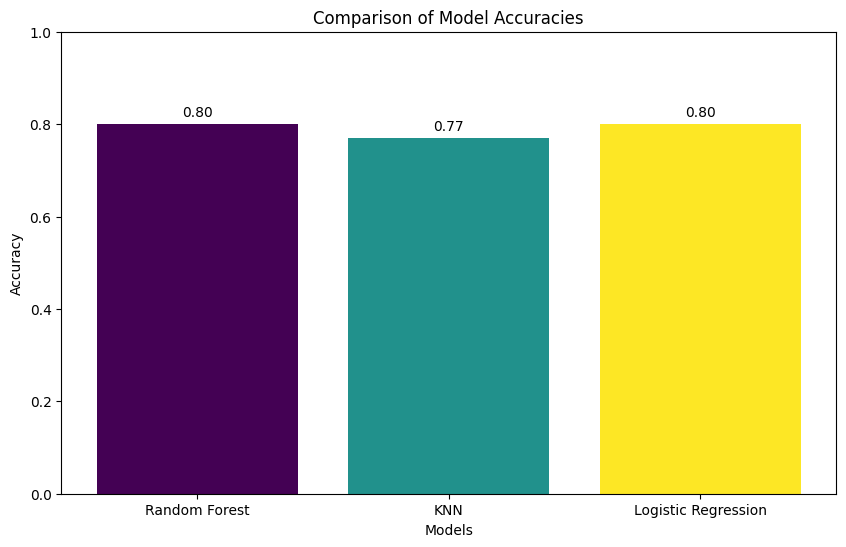

In [26]:
models = ['Random Forest', 'KNN', 'Logistic Regression']
accuracies = [rf_accuracy, knn_accuracy, lr_accuracy]

colors = plt.cm.viridis(np.linspace(0, 1, len(models)))

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)

for bar, accuracy in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{accuracy:.2f}', ha='center', va='bottom')

plt.show()